In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import cv2
import time as t
from PIL import Image
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import random as rn

In [7]:
signs = ["fist", "chille", "V", "Hand"]
data_paths = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\data\ "
test_path = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\test\ "
num_images = 300
num_test = 20

In [23]:
camera = cv2.VideoCapture(0)

In [20]:

for k in range(len(signs)):
    print("changing sign: 3sec")
    print("taking pictures!   " + signs[k])
    t.sleep(3)
    for i in range(num_images):
        print("taking pictures!   " + signs[k])
        return_value, image = camera.read()
        cv2.imwrite(data_paths+ signs[k]+str(i)+'.png', image)
        plt.imshow(image)
        plt.show()
        t.sleep(rn.random())
        clear_output()
print("done")
del(camera)


done


In [19]:
print(rn.random())

0.2939543114752813


In [30]:
#create  paths

paths = []
for k in range(len(signs)):
    for i in range(num_images):
        paths.append(data_paths+ signs[k]+str(i)+'.png')

#create y
y = []

for k in range(len(signs)):
    for i in range(num_images):
        y.append(k)



In [24]:
### Test images

for k in range(len(signs)):
    print("changing sign: 3sec")
    print("taking pictures!   " + signs[k])
    t.sleep(3)
    for i in range(num_test):
        print("taking pictures!   " + signs[k])
        return_value, image = camera.read()
        cv2.imwrite(test_path+ signs[k]+str(i)+'.png', image)
        plt.imshow(image)
        plt.show()
        t.sleep(0.05)
        clear_output()
print("done")
del(camera)

p_test = []
for k in range(len(signs)):
    for i in range(num_test):
        p_test.append(test_path+ signs[k]+str(i)+'.png')

#create y
y_test = []

for k in range(len(signs)):
    for i in range(num_images):
        y_test.append(k)




done


In [31]:
x_test = []
for k in range(len(signs)):
    for i in range(num_test):
        x_test.append(test_path+ signs[k]+str(i)+'.png')

#create y
y_test = []

for k in range(len(signs)):
    for i in range(num_test):
        y_test.append(k)
print(len(y_test))

80


In [32]:
#get images   uuubberprüfen
def img_gen(path, size):
    img = Image.open(path)
    s = np.shape(img)
    new_size = (size,size)
    img = img.resize(new_size, Image.ANTIALIAS)
    img = np.array(img) / 255
    return img


img_size = 80



def mapping(arr):
    map = lambda t: img_gen(t, img_size)
    res = np.array([map(i) for i in arr])
    return res



Using Train-Test_split not usful, because same kind of pictures...
insted creating secon dataset for tesiting 

In [ ]:
paths = np.array(paths)
paths = paths.reshape(num_images*len(signs),1)
y = np.array(y)
y =y.reshape(num_images*len(signs),1)


x_train, x_test, y_train, y_test = train_test_split(paths, y, test_size=0.2, random_state=42)
x_train = x_train.reshape(1,x_train.shape[0])
x_test = x_test.reshape(1,x_test.shape[0])


x_train = x_train.ravel().tolist()
x_test = x_test.ravel().tolist()
y_train = y_train.ravel().tolist()
y_test = y_test.ravel().tolist()


x_train = mapping(list(x_train))
x_test = mapping(list(x_test))
y_train = tf.one_hot(y_train, len(signs)) 
y_test = tf.one_hot(y_test, len(signs)) 

x_test = mapping(list(p_test))
y_test = tf.one_hot(y_test, len(signs)) 


In [33]:
rn.shuffle(paths)
rn.shuffle(y)
rn.shuffle(x_test)
rn.shuffle(y_test)


x_train = mapping(list(paths))
x_test = mapping(list(p_test))
y_train = tf.one_hot(y, len(signs)) 
y_test = tf.one_hot(y_test, len(signs)) 



C:\Users\Luis\AppData\Local\Temp\ipykernel_10348\1524545939.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, Image.ANTIALIAS)


In [47]:
#wandb.init(
 #   project="MA hand signs")
shape = (img_size, img_size, 3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,kernel_size=(5,5), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"),
    tf.keras.layers.Conv2D(5,kernel_size=(4,4), padding="same", input_shape=shape, activation="relu"),
  #  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"),
 #   tf.keras.layers.Conv2D(5,kernel_size=(3,3), padding="same", input_shape=shape, activation="relu"),
    tf.keras.layers.Flatten(input_shape=shape),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(signs), activation='softmax')
    ])



# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

#model.fit(x_train, y_train, epochs=15, batch_size=8)

history = model.fit(x=x_train, y=y_train,
                    epochs=15,
                    batch_size=8,
                    validation_data=(x_test, y_test),
                    )

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

#wandb.finish()

Epoch 1/15
100/100 [==============================] - 1s 6ms/step - loss: 0.5962 - accuracy: 0.2212 - val_loss: 0.5691 - val_accuracy: 0.2500
Epoch 2/15
100/100 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.2875 - val_loss: 0.5646 - val_accuracy: 0.2500
Epoch 3/15
100/100 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.2975 - val_loss: 0.5665 - val_accuracy: 0.2625
Epoch 4/15
100/100 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.2900 - val_loss: 0.5646 - val_accuracy: 0.2375
Epoch 5/15
100/100 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.3587 - val_loss: 0.5712 - val_accuracy: 0.2250
Epoch 6/15
100/100 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.3837 - val_loss: 0.5705 - val_accuracy: 0.2250
Epoch 7/15
100/100 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.4700 - val_loss: 0.5855 - val_accuracy: 0.2375
Epoch 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'camera' is not defined

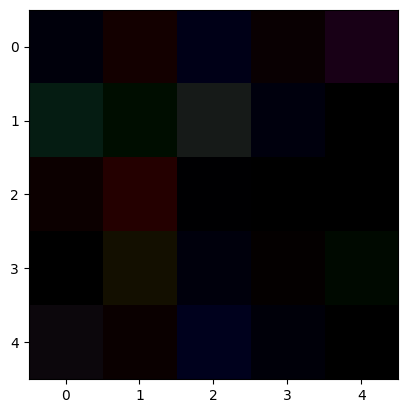

In [44]:
w = model.weights
w0 = w[0]
w_0 = np.reshape(w0,(10,5,5,3))
w0_0 = w_0[3]

plt.imshow(w0_0)


In [179]:
##Testing
#camera = cv2.VideoCapture(0)

p = []
test_path = r"C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns 2\test\ "
print("mache Zeichen")
t.sleep(1.5)
for k in range(1):
    print("change")
    for i in range(30):
       # print("change" +str(i))
        t.sleep(0.2)
        return_value, image = camera.read()
        cv2.imwrite(test_path+ "test"+str(i)+".png", image)
        p.append(test_path+ "test"+str(i)+".png")

    

print("done")
#del(camera)

mache Zeichen
change
done


In [247]:

pred = model(mapping(p))

def probabilities(pred):
    k = 0
    a = np.zeros(4)
    for i in pred:
        a += i
    scaled = a/sum(a)
    for i in signs:
        print(str(i) + " = " + str(round(float(scaled[k]*100),5))+ " %")
        k += 1
probabilities(pred)

C:\Users\Luis\AppData\Local\Temp\ipykernel_12360\1524545939.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, Image.ANTIALIAS)


fist = 31.33945 %
chille = 18.94881 %
V = 18.85773 %
Hand = 30.85401 %


C:\Users\Luis\AppData\Local\Temp\ipykernel_12360\1524545939.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, Image.ANTIALIAS)


tf.Tensor([7.3059325 1.1767554 5.88347   5.633841 ], shape=(4,), dtype=float32)


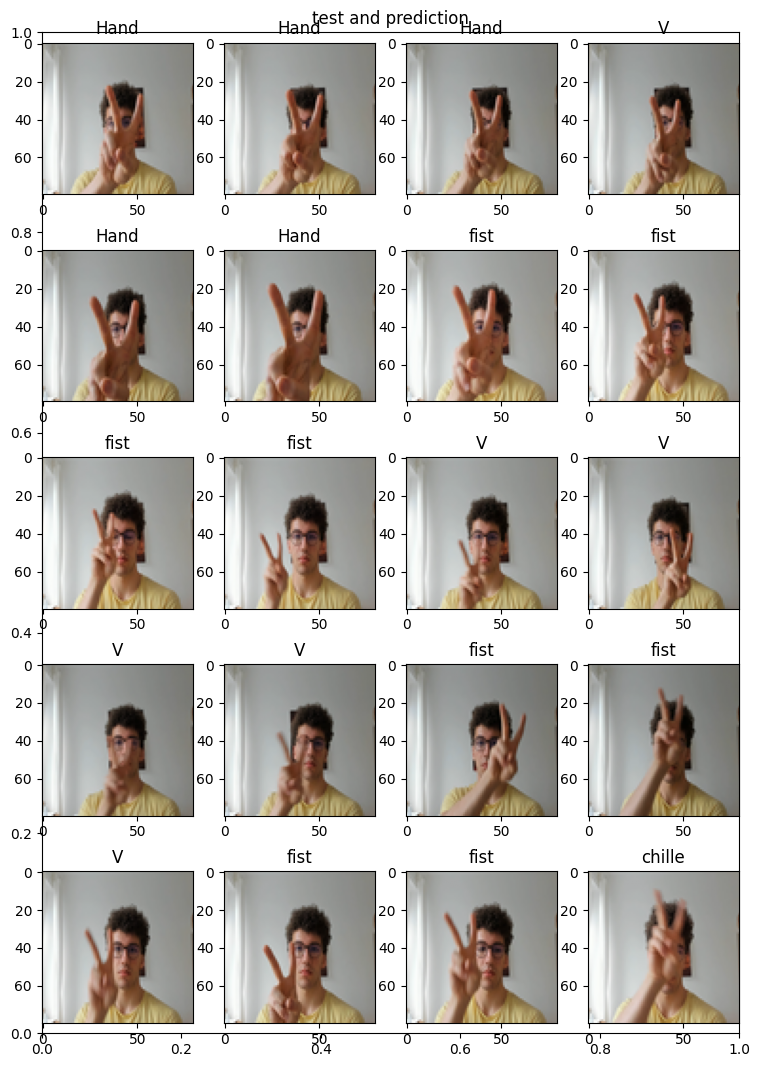

In [173]:
w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
plt.title("test and prediction")
columns = 4
rows = 5
x = mapping(p)
pred = model(x)
ax = []
s = np.zeros(4)
for i in range(columns*rows):
    img = x[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(str(signs[np.argmax(pred[i])]))  
    plt.imshow(img)
    s += pred[i]
print(s)


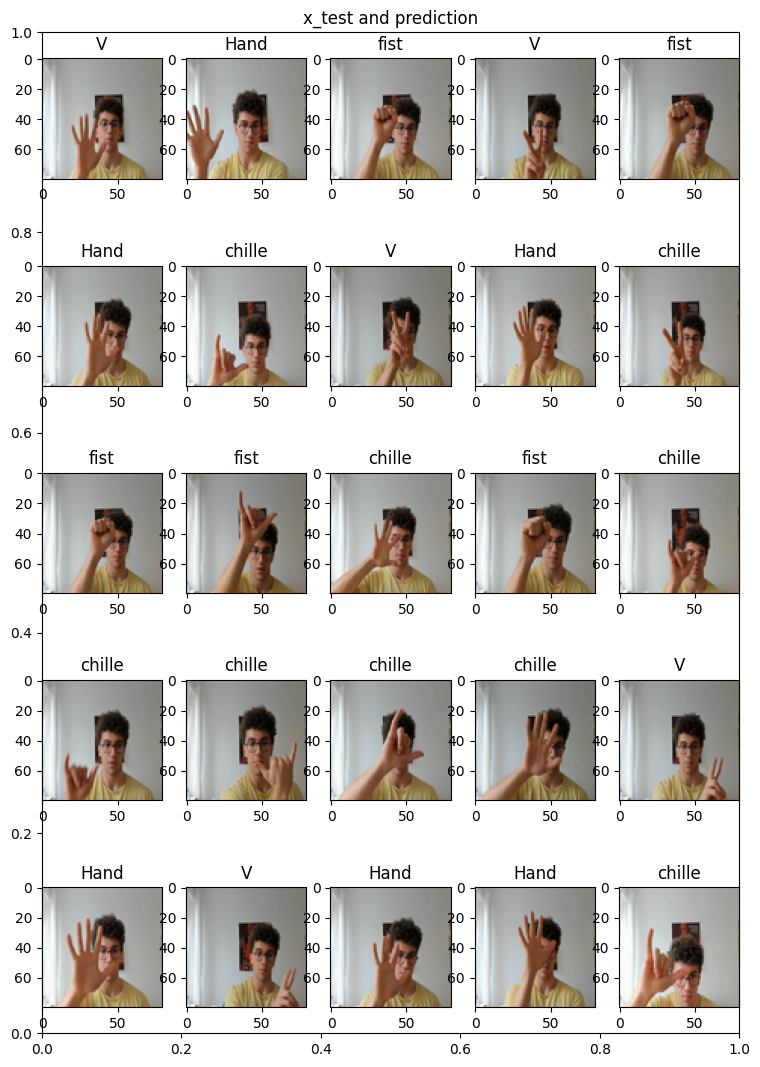

In [135]:
w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
plt.title("x_test and prediction")
columns = 5
rows = 5
x = x_test
pred = model(x_test)
ax = []

for i in range(columns*rows):
    img = x[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(str(signs[np.argmax(pred[i])]))  # set title
    plt.imshow(img)


In [ ]:
img = x_test[0]
img.resize(100,100,3)
images = []
images.append(img)
img = model.layers
images.append()